In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import os

In [ ]:
# blurred = cv2.GaussianBlur(img, (5, 5), 0)
# gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
# ret, mask = cv2.threshold(gray, 50,255, cv2.THRESH_BINARY_INV)
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
# mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((5,5)))

# blur = cv2.Canny(img, 150,200)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# _, blur = cv2.threshold(gray,50,255,cv2.THRESH_BINARY_INV )
# # dilation = cv2.dilate(blur,np.ones((3,3)),iterations = 2)
# opening = cv2.morphologyEx(blur,cv2.)
# blur = cv2.GaussianBlur(dilation,(7,7),3)
# blur = cv2.medianBlur(dilation , 11)

In [ ]:
img = cv2.imread('shapesReal.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# for noise image
# b_l = np.array([0,106,111])
# b_h = np.array([255,255,255])

# real image
b_l = np.array([17,64,198])
b_h = np.array([255,255,255])

mask = cv2.inRange(hsv, b_l, b_h)
res = cv2.bitwise_and(img ,img, mask=mask)
imgGrey = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

contours, _ = cv2.findContours(imgGrey, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, (0, 255, 0), 5)
    x = approx.ravel()[0]   
    y = approx.ravel()[1] - 8
    
    if len(approx) == 3:  
        cv2.putText(img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 255))               

    elif len(approx) == 4 : 
        x1 ,y1, w, h = cv2.boundingRect(approx) 
        aspectRatio = float(w)/h   
        if aspectRatio >= 0.95 and aspectRatio <= 1.05:   
            cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 255))
        else:
            cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 255))                     

    elif len(approx) == 5:           
        cv2.putText(img, "Pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 255))                

    elif len(approx) == 10:
        
        cv2.putText(img, "Star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 255))                

    else:
        cv2.putText(img, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 255))                 

cv2.imshow("gray", imgGrey)
cv2.imshow("blur", res)
cv2.imshow("dilation", res)
cv2.imshow("shapes", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def nothing(c):
    pass
cv2.namedWindow('tracking')
cv2.createTrackbar('LH','tracking',0, 255,nothing)
cv2.createTrackbar('LS','tracking',0, 255,nothing)
cv2.createTrackbar('LV','tracking',0, 255,nothing)
cv2.createTrackbar('UH','tracking',255, 255,nothing)
cv2.createTrackbar('US','tracking',255, 255,nothing)
cv2.createTrackbar('UV','tracking',255, 255,nothing)

while True:
    frame = cv2.imread('shapesReal.jpg')
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lh = cv2.getTrackbarPos('LH', 'tracking')
    ls = cv2.getTrackbarPos('LS', 'tracking')
    lv = cv2.getTrackbarPos('LV', 'tracking')
    
    uh = cv2.getTrackbarPos('UH', 'tracking')
    us = cv2.getTrackbarPos('US', 'tracking')
    uv = cv2.getTrackbarPos('UV', 'tracking')
    
    b_l = np.array([lh, ls, lv])
    b_h = np.array([uh, us, uv])

    mask = cv2.inRange(hsv, b_l, b_h)
    
    
    res = cv2.bitwise_and(frame ,frame, mask=mask)
#     b2 = frame[:,:,0] * mask
#     g2 = frame[:,:,1] * mask
#     r2 = frame[:,:,2] * mask
#     res2 = cv2.merge([b2,g2,r2])
    cv2.imshow('frame',frame)
    cv2.imshow('hsv',hsv)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
    k = cv2.waitKey(1) & 0XFF
    if k == 27 :
        break
        
cv2.destroyAllWindows()

### image Histograms and contrast stretching

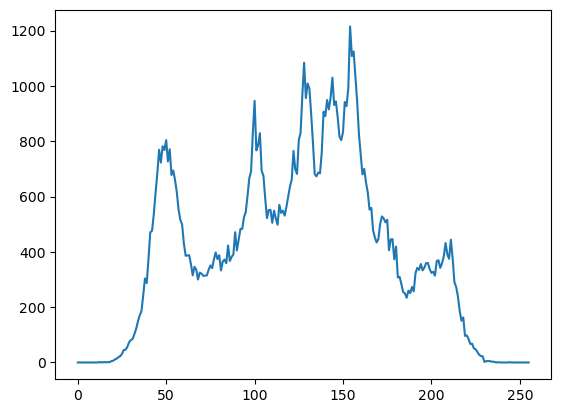

In [18]:
img = cv2.imread("lena.jpg",0)
#img = np.zeros((200,200), np.uint8)
#cv2.rectangle(img, (0, 100), (200, 200), (255), -1)
#cv2.rectangle(img, (0, 50), (100, 100), (127), -1)

# b, g, r = cv2.split(img)
cv2.imshow("img", img)
# cv2.imshow("b", b)
# cv2.imshow("g", g)
# cv2.imshow("r", r)

# plt.hist(img.ravel(), 256, [0, 255])
# plt.hist(b.ravel(), 256, [0, 255])
# plt.hist(g.ravel(), 256, [0, 255])
# plt.hist(r.ravel(), 256, [0, 255])

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)

plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

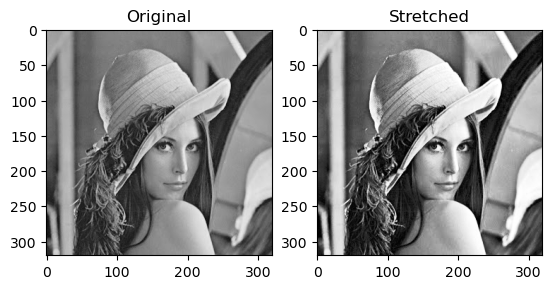

In [27]:
img = cv2.imread("lena.jpg",0)
hist, bins = np.histogram(img, bins=256, range=(0, 255))
cdf = hist.cumsum()

cdf_normalized = cdf * hist.max() / cdf.max()

# Compute histogram equalization lookup table (LUT)
lut = np.interp(np.arange(256), bins[:-1], cdf_normalized)

# Apply contrast stretching using LUT
img_stretched = cv2.LUT(img, lut)

# Display original and stretched images
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(img_stretched, cmap='gray')
plt.title('Stretched')
plt.show()

### Segmentation by using Otsu's Binarization

### Object Detection Using template matching

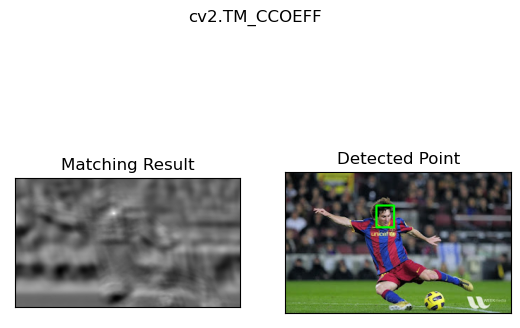

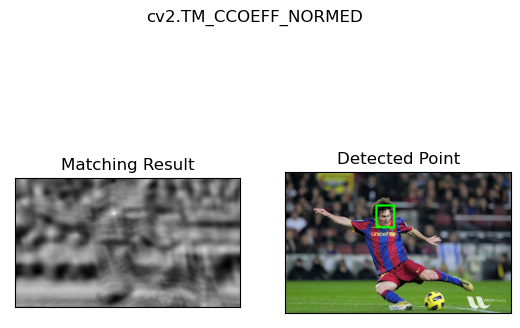

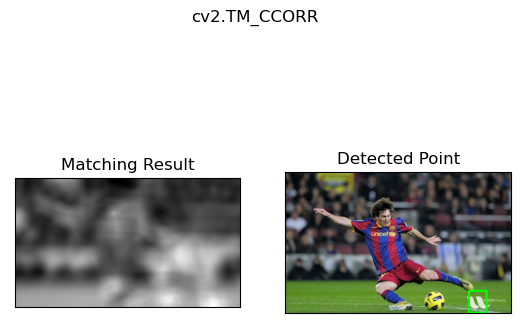

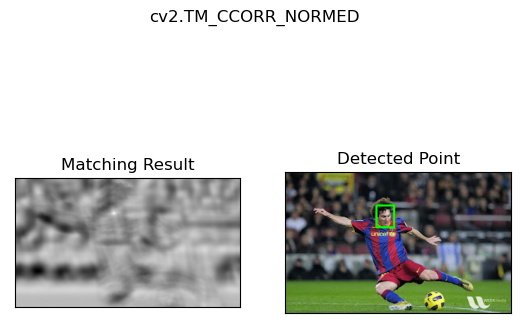

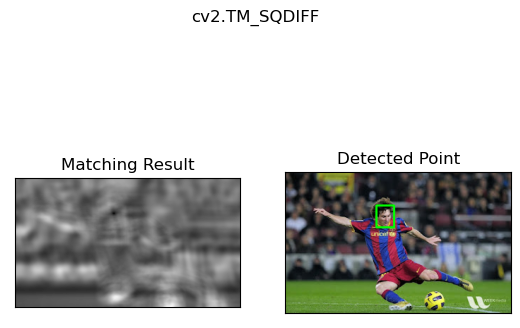

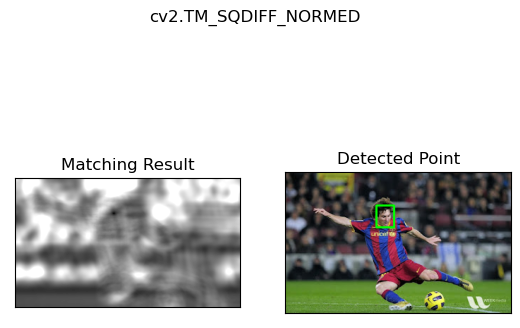

In [53]:
img = cv2.imread('messi5.jpg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread('messi5_face.jpg', cv2.IMREAD_GRAYSCALE)
w, h = template.shape[::-1]
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for methodstr in methods:
    imgcolor = img.copy()
    imgray = img2.copy()
    method = eval(methodstr)
    result =cv2.matchTemplate(imgray, template, method )
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        point = minLoc
    else:
        point = maxLoc
    cv2.rectangle(imgcolor, point,[point[0]+w, point[1]+h], (0,255,0), 2)
    plt.subplot(121)
    plt.imshow(result,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122)
#     plt.imshow(imgray,cmap = 'gray')
    plt.imshow(imgcolor[:,:,::-1],)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(methodstr)
    plt.show()


In [54]:
img = cv2.imread("messi5.jpg")
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread("messi5_face.jpg", 0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(grey_img, template, cv2.TM_CCORR_NORMED )
threshold = 0.99;
loc = np.where(res >= threshold) 
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

cv2.imshow('res',res)
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(array([47], dtype=int64), array([129], dtype=int64))


### Face and Eye Detection using Haar Cascade Classifiers

- Selecting Haar-like features
- Creating an integral image
- Running AdaBoost training
- Creating Classifier Cascade

In [11]:
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('HaarCascade/FaceDetection.avi', fourcc, 5.0,(640,480))

face_detect = cv2.CascadeClassifier('HaarCascade/haarcascade_frontalface_default.xml')
eye_dectect = cv2.CascadeClassifier('HaarCascade/haarcascade_eye.xml')
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Face
        faces = face_detect.detectMultiScale(gray,1.1,5 )
        for face in faces:
            x,y,w,h = face
            roi_gray = gray[y:y+h, x:x+w]
#             cv2.imshow('roi', roi_gray)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0),2)
            cv2.putText(frame, 'Face', (x, y-4),
                        cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,255),2)
            #--- Eye ---
            eyes = eye_dectect.detectMultiScale(roi_gray, 1.1, 5)
            for xe,ye,we,he in eyes:
                cv2.circle(frame, (x+ xe+int(we/2), y+ ye+int(he/2)), 
                           int(min([he,we])/2), (255,0,255), 1)
                cv2.putText(frame, 'Eye', (x+xe, y+ye-4),
                            cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,255),2)
        cv2.imshow('frame',frame)
        
        out.write(frame)
        key = cv2.waitKey(1)
        if key == 27:
            break

cv2.destroyAllWindows()            
out.release()
cap.release()
            
            